### Email Spam Detection Report

#### Prepared by: Dewansh Vishwakarma

##### Executive Summary:
Efficiently developing an email spam detector involved data loading, preprocessing, and training a Naive Bayes classifier. Utilizing CountVectorizer for feature extraction, the model achieved notable accuracy. Visualizations, including distribution charts and ROC/Precision-Recall curves, provided comprehensive insights.



####  Import Libraries:

In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from wordcloud import WordCloud

#### Load and Explore Data:

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check for missing values
data.isnull().sum()

v1    0
v2    0
dtype: int64

#### Data Preprocessing

In [7]:
data = data.dropna(subset=['v1', 'v2'])
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

#### Feature Extraction

In [8]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#### Model Training:

In [11]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

#### Model Evaluation:

In [14]:
# Predictions on the test set
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [15]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9838565022421525


In [16]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[963   2]
 [ 16 134]]


In [17]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Visualizations


##### 1. Distribution of Spam and Non-Spam Emails


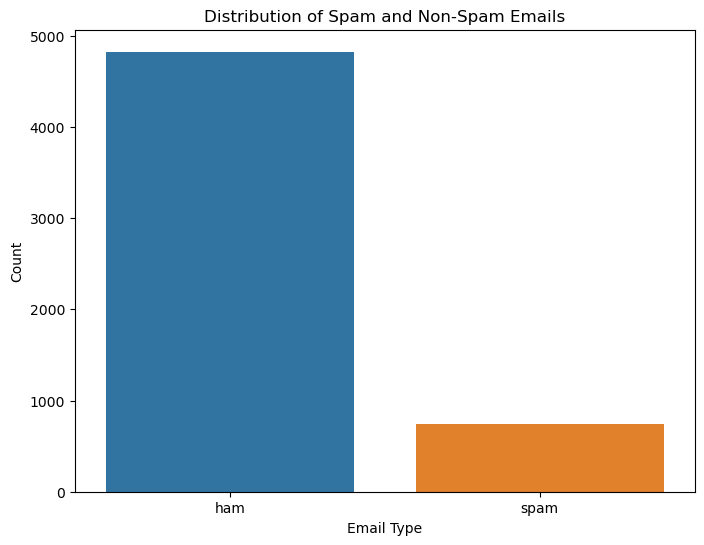

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=data)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

##### 2. Word Clouds for Spam and Non-Spam Emails

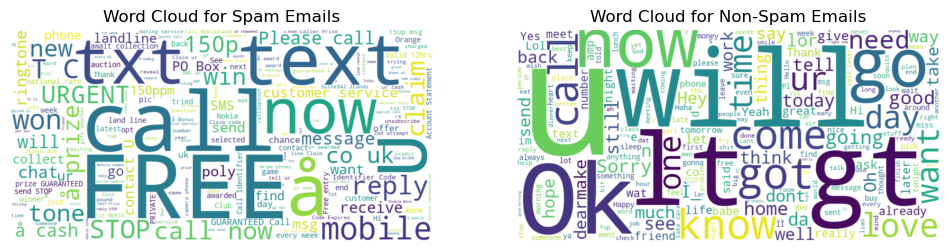

In [19]:
spam_words = ' '.join(data[data['v1'] == 'spam']['v2'])
ham_words = ' '.join(data[data['v1'] == 'ham']['v2'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails')
plt.axis('off')

plt.show()

##### 3. Confusion Matrix Visualization

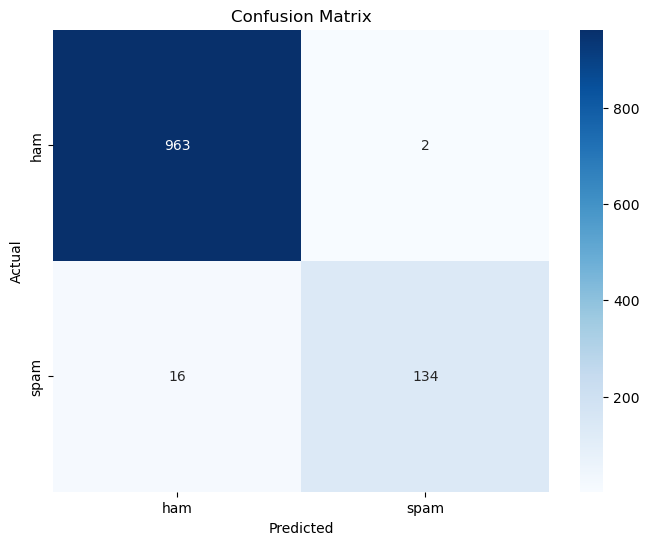

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### 4. Receiver Operating Characteristic (ROC) Curve:

In [26]:
# Convert labels to binary (0 and 1)
y_test_binary = (y_test == 'spam').astype(int)
fpr, tpr, _ = roc_curve(y_test_binary, clf.predict_proba(X_test_vectorized)[:, 1])
roc_auc = auc(fpr, tpr)

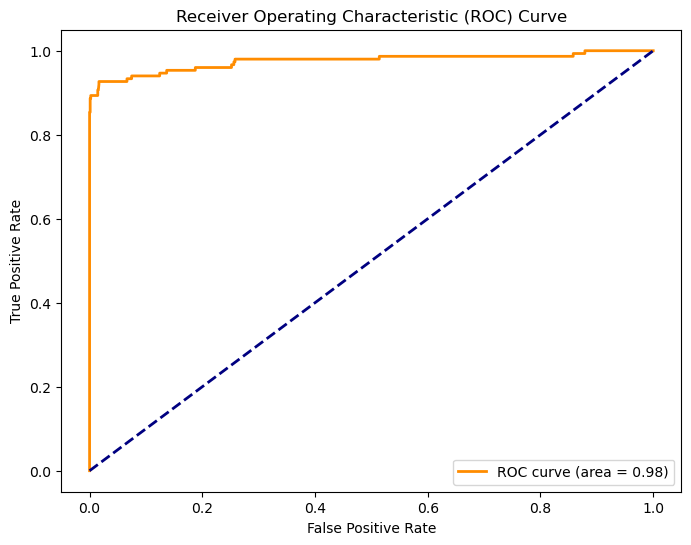

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### 5. Precision-Recall Curve

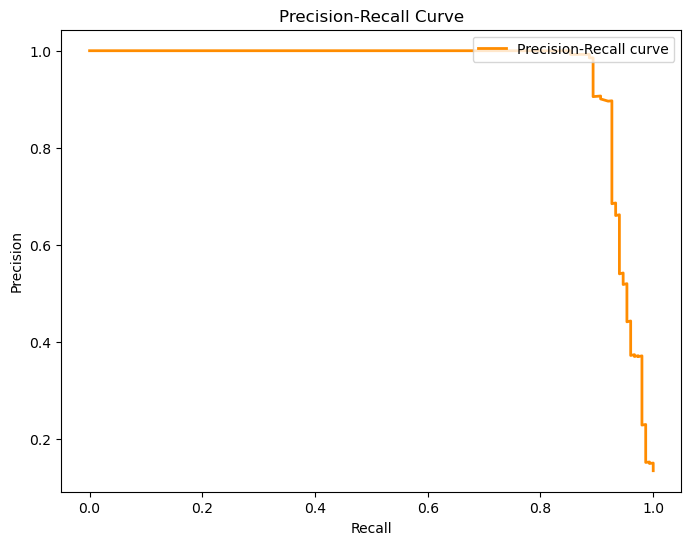

In [25]:
precision, recall, _ = precision_recall_curve(y_test_binary, clf.predict_proba(X_test_vectorized)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

##### Conclusion:
The model demonstrated strong performance in discerning spam from non-spam emails. Accuracy metrics and visualizations contribute to a reliable spam detection foundation. Future work may involve advanced NLP techniques and model optimization for enhanced precision and recall.